<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Introduction to APIs

## The `requests` Library
The `requests` library is a library for submitting HTTP requests from Python. Despite its frequent use, it's not included in the Python standard library. You'll need to `pip install requests` yourself.
![](../imgs/pokeapi.png)

In [1]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Create url for API call.
url_squirtle = "https://pokeapi.co/api/v2/pokemon/squirtle"

In [3]:
# Submit request
req = requests.get(url_squirtle)

In [4]:
# Request response code
req.status_code

200

In [5]:
# Text of request
req.text

'{"abilities":[{"ability":{"name":"torrent","url":"https://pokeapi.co/api/v2/ability/67/"},"is_hidden":false,"slot":1},{"ability":{"name":"rain-dish","url":"https://pokeapi.co/api/v2/ability/44/"},"is_hidden":true,"slot":3}],"base_experience":63,"forms":[{"name":"squirtle","url":"https://pokeapi.co/api/v2/pokemon-form/7/"}],"game_indices":[{"game_index":177,"version":{"name":"red","url":"https://pokeapi.co/api/v2/version/1/"}},{"game_index":177,"version":{"name":"blue","url":"https://pokeapi.co/api/v2/version/2/"}},{"game_index":177,"version":{"name":"yellow","url":"https://pokeapi.co/api/v2/version/3/"}},{"game_index":7,"version":{"name":"gold","url":"https://pokeapi.co/api/v2/version/4/"}},{"game_index":7,"version":{"name":"silver","url":"https://pokeapi.co/api/v2/version/5/"}},{"game_index":7,"version":{"name":"crystal","url":"https://pokeapi.co/api/v2/version/6/"}},{"game_index":7,"version":{"name":"ruby","url":"https://pokeapi.co/api/v2/version/7/"}},{"game_index":7,"version":{"na

In [6]:
# Bring in the JSON!
sq = req.json()
type(sq)

dict

In [7]:
# Since we've converted the JSON -> dict, we know how to work with this!
sq.keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [8]:
# Height, Weight
print(sq['height'])
print(sq['weight'])

5
90


In [9]:
# Sprites?
sq['sprites']['back_default']

'https://raw.githubusercontent.com/PokeAPI/sprites/master/sprites/pokemon/back/7.png'

In [10]:
# What moves can squirtle learn?
sq['moves']

[{'move': {'name': 'mega-punch', 'url': 'https://pokeapi.co/api/v2/move/5/'},
  'version_group_details': [{'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'red-blue',
     'url': 'https://pokeapi.co/api/v2/version-group/1/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'machine',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/4/'},
    'version_group': {'name': 'yellow',
     'url': 'https://pokeapi.co/api/v2/version-group/2/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'emerald',
     'url': 'https://pokeapi.co/api/v2/version-group/6/'}},
   {'level_learned_at': 0,
    'move_learn_method': {'name': 'tutor',
     'url': 'https://pokeapi.co/api/v2/move-learn-method/3/'},
    'version_group': {'name': 'firered-leafgreen',
     'u

In [11]:
# Whoa! Let's build a function to extract a pokemon's possible moves
def get_moves_dict(pkmn):
    return [move['move']['name'] for move in pkmn['moves']]

In [14]:
sq_moves = [get_moves_dict(move) for move in sq['moves']]

KeyError: 'moves'

In [15]:
sq_moves = get_moves_dict(sq)

In [16]:
sq_moves

['mega-punch',
 'ice-punch',
 'mega-kick',
 'headbutt',
 'tackle',
 'body-slam',
 'take-down',
 'double-edge',
 'tail-whip',
 'bite',
 'mist',
 'water-gun',
 'hydro-pump',
 'surf',
 'ice-beam',
 'blizzard',
 'bubble-beam',
 'submission',
 'counter',
 'seismic-toss',
 'strength',
 'dig',
 'toxic',
 'confusion',
 'rage',
 'mimic',
 'double-team',
 'withdraw',
 'defense-curl',
 'haze',
 'reflect',
 'bide',
 'waterfall',
 'skull-bash',
 'bubble',
 'rest',
 'substitute',
 'snore',
 'curse',
 'flail',
 'protect',
 'mud-slap',
 'foresight',
 'icy-wind',
 'endure',
 'rollout',
 'swagger',
 'attract',
 'sleep-talk',
 'return',
 'frustration',
 'dynamic-punch',
 'rapid-spin',
 'iron-tail',
 'hidden-power',
 'rain-dance',
 'mirror-coat',
 'rock-smash',
 'whirlpool',
 'fake-out',
 'hail',
 'facade',
 'focus-punch',
 'brick-break',
 'yawn',
 'refresh',
 'secret-power',
 'dive',
 'mud-sport',
 'rock-tomb',
 'water-spout',
 'muddy-water',
 'iron-defense',
 'water-pulse',
 'gyro-ball',
 'brine',
 'nat

In [17]:
base_url = "https://pokeapi.co/api/v2/pokemon/"

# Build a function that would get us a pokemnon JSON
def get_pkmn(name):
    return requests.get(base_url + name).json()

In [18]:
# Use the function to get the JSON 
get_pkmn("snorlax").keys()

dict_keys(['abilities', 'base_experience', 'forms', 'game_indices', 'height', 'held_items', 'id', 'is_default', 'location_area_encounters', 'moves', 'name', 'order', 'past_types', 'species', 'sprites', 'stats', 'types', 'weight'])

In [19]:
# Incorporate both function together
def get_moves(name):
    pkmn = get_pkmn(name)
    return get_moves_dict(pkmn)

In [20]:
get_moves("gyarados")[0:5]

['headbutt', 'tackle', 'body-slam', 'take-down', 'thrash']

## Ok, let's try a more complicated API - for stocks!
![](../imgs/alpha-vantage.png)
If you haven't already - grab your free API key for Alpha Vantage [here](https://www.alphavantage.co). It takes five seconds.

**(THREAD): Why do you think companies would require the use of an API key?**

Alpha Vantage has documentation [here](https://www.alphavantage.co/documentation/).

In [21]:
key = "D8ASYC8PY2K0OEFJ"

In [22]:
# Most APIs have a single base URL from which API calls are made.
# If you look closely at the examples, this is Alpha Vantage's.
base_url = "https://www.alphavantage.co/query"

In [23]:
# This is the example url/request
"https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo"

'https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo'

In [24]:
# AV API Demo URL
demo = requests.get("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&symbol=IBM&interval=5min&apikey=demo")
demo.status_code

200

In [25]:
demo.json()['Meta Data']

{'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
 '2. Symbol': 'IBM',
 '3. Last Refreshed': '2021-05-25 17:05:00',
 '4. Interval': '5min',
 '5. Output Size': 'Compact',
 '6. Time Zone': 'US/Eastern'}

In [26]:
# Let's build out this request.
# This is a very common format for pure API requests to come in
res = requests.get(url=base_url, params={
    "function":"TIME_SERIES_INTRADAY",
    "interval":"5min",
    "symbol":"ADI",
    'apikey':key
})
res.status_code

200

In [30]:
# Let's grab that data!
data = res.json()

In [31]:
data

{'Meta Data': {'1. Information': 'Intraday (5min) open, high, low, close prices and volume',
  '2. Symbol': 'ADI',
  '3. Last Refreshed': '2021-05-25 16:05:00',
  '4. Interval': '5min',
  '5. Output Size': 'Compact',
  '6. Time Zone': 'US/Eastern'},
 'Time Series (5min)': {'2021-05-25 16:05:00': {'1. open': '163.7200',
   '2. high': '163.9700',
   '3. low': '163.6580',
   '4. close': '163.9700',
   '5. volume': '32760'},
  '2021-05-25 16:00:00': {'1. open': '163.3300',
   '2. high': '163.8900',
   '3. low': '163.2900',
   '4. close': '163.7800',
   '5. volume': '209023'},
  '2021-05-25 15:55:00': {'1. open': '163.1700',
   '2. high': '163.3700',
   '3. low': '163.0900',
   '4. close': '163.3000',
   '5. volume': '106655'},
  '2021-05-25 15:50:00': {'1. open': '163.2700',
   '2. high': '163.4000',
   '3. low': '163.1150',
   '4. close': '163.1300',
   '5. volume': '69595'},
  '2021-05-25 15:45:00': {'1. open': '163.4200',
   '2. high': '163.4500',
   '3. low': '163.2100',
   '4. close':

In [33]:
data.keys()

dict_keys(['Meta Data', 'Time Series (5min)'])

In [34]:
# Well, this looks like a familiar format...
data = data['Time Series (5min)'] # json['Meta Data']

In [35]:
json['Time Series (5min)']['2020-11-18 18:35:00']

NameError: name 'json' is not defined

In [38]:
data['2021-05-25 15:55:00']

{'1. open': '163.1700',
 '2. high': '163.3700',
 '3. low': '163.0900',
 '4. close': '163.3000',
 '5. volume': '106655'}

In [ ]:
# Turn it into a data frame!
adi = pd.DataFrame(json['Time Series (5min)']).T
adi.head()

In [40]:
adi = pd.DataFrame(data).T

adi.head()

,1. open,2. high,3. low,4. close,5. volume
2021-05-25 16:05:00,163.7200,163.9700,163.6580,163.9700,32760
2021-05-25 16:00:00,163.3300,163.8900,163.2900,163.7800,209023
2021-05-25 15:55:00,163.1700,163.3700,163.0900,163.3000,106655
2021-05-25 15:50:00,163.2700,163.4000,163.1150,163.1300,69595
2021-05-25 15:45:00,163.4200,163.4500,163.2100,163.2800,32592


In [41]:
adi.index = pd.to_datetime(adi.index)
adi.head()

,1. open,2. high,3. low,4. close,5. volume
2021-05-25 16:05:00,163.7200,163.9700,163.6580,163.9700,32760
2021-05-25 16:00:00,163.3300,163.8900,163.2900,163.7800,209023
2021-05-25 15:55:00,163.1700,163.3700,163.0900,163.3000,106655
2021-05-25 15:50:00,163.2700,163.4000,163.1150,163.1300,69595
2021-05-25 15:45:00,163.4200,163.4500,163.2100,163.2800,32592


In [42]:
adi.index[0:5]

DatetimeIndex(['2021-05-25 16:05:00', '2021-05-25 16:00:00',
               '2021-05-25 15:55:00', '2021-05-25 15:50:00',
               '2021-05-25 15:45:00'],
              dtype='datetime64[ns]', freq=None)

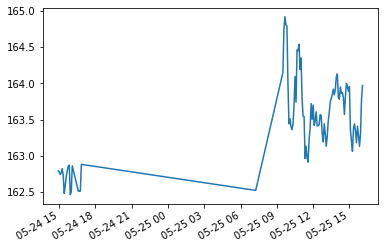

In [43]:
# Plot the closing price
adi['4. close'].astype(float).plot();

In [44]:
# Let's build out this request again - daily stock prices this time
# This is a very common format for pure API requests to come in
res = requests.get(url=base_url, params={
    "function":"TIME_SERIES_DAILY",
    "symbol":"TSLA",
    'apikey':key
})
res.status_code

200

In [45]:
json = res.json()
json['Time Series (Daily)']

{'2021-05-25': {'1. open': '607.3100',
  '2. high': '613.9900',
  '3. low': '595.7100',
  '4. close': '604.6900',
  '5. volume': '28005933'},
 '2021-05-24': {'1. open': '581.6000',
  '2. high': '614.4800',
  '3. low': '573.6500',
  '4. close': '606.4400',
  '5. volume': '34558089'},
 '2021-05-21': {'1. open': '596.1100',
  '2. high': '596.6800',
  '3. low': '580.0000',
  '4. close': '580.8800',
  '5. volume': '26030595'},
 '2021-05-20': {'1. open': '575.0000',
  '2. high': '588.8500',
  '3. low': '571.0700',
  '4. close': '586.7800',
  '5. volume': '30821119'},
 '2021-05-19': {'1. open': '552.5500',
  '2. high': '566.2100',
  '3. low': '546.9800',
  '4. close': '563.4600',
  '5. volume': '39578395'},
 '2021-05-18': {'1. open': '568.0000',
  '2. high': '596.2500',
  '3. low': '563.3800',
  '4. close': '577.8700',
  '5. volume': '36830567'},
 '2021-05-17': {'1. open': '575.5531',
  '2. high': '589.7300',
  '3. low': '561.2000',
  '4. close': '576.8300',
  '5. volume': '32390360'},
 '2021

In [46]:
tesla = pd.DataFrame(json['Time Series (Daily)']).T
tesla.index = pd.to_datetime(tesla.index)
tesla.head()

,1. open,2. high,3. low,4. close,5. volume
2021-05-25,607.3100,613.9900,595.7100,604.6900,28005933
2021-05-24,581.6000,614.4800,573.6500,606.4400,34558089
2021-05-21,596.1100,596.6800,580.0000,580.8800,26030595
2021-05-20,575.0000,588.8500,571.0700,586.7800,30821119
2021-05-19,552.5500,566.2100,546.9800,563.4600,39578395


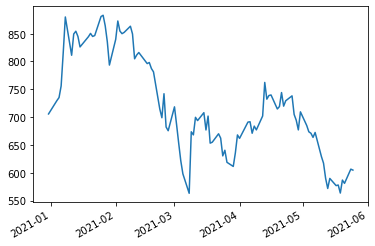

In [47]:
# Plot the closing price of Tesla
tesla['4. close'].astype(float).plot();

### Challenge
Write your own function that inputs a ticker symbol and outputs the above.

In [48]:
def get_price_data(sym):
    base_url = "https://www.alphavantage.co/query"
    req = requests.get(
        base_url,
        params={
            "function": "TIME_SERIES_DAILY",
            "symbol": sym,
            "apikey": ""
        }
    )
    data = req.json()['Time Series (Daily)']
    return pd.DataFrame(data).T

In [49]:
get_price_data('AAPL').head()

KeyError: 'Time Series (Daily)'

In [50]:
def get_price_data(sym):
    base_url = "https://www.alphavantage.co/query"
    req = requests.get(
        base_url,
        params={
            "function": "TIME_SERIES_DAILY",
            "symbol": sym,
            "apikey": key
        }
    )
    data = req.json()['Time Series (Daily)']
    return pd.DataFrame(data).T

In [51]:
get_price_data('AAPL').head()

,1. open,2. high,3. low,4. close,5. volume
2021-05-25,127.8200,128.3200,126.3200,126.9000,72009482
2021-05-24,126.0100,127.9400,125.9400,127.1000,63092945
2021-05-21,127.8200,128.0000,125.2100,125.4300,79295436
2021-05-20,125.2300,127.7200,125.1000,127.3100,76857123
2021-05-19,123.1600,124.9150,122.8600,124.6900,92611989


### Did this feel like a lot of work? You're not alone.
For web APIs such as these, open sourcerers (ordinary programmers like you and me!) like to build language-specific **API wrappers** to easier call the API. Interestingly, based on our very vague definition of APIs, API wrappers are also themselves APIs!

Alpha Vantage has a Python API wrapper made by user `RomelTorres` [here](https://github.com/RomelTorres/alpha_vantage)!

![](../imgs/opensource.jpg)

## You want data? You got data.

### Key Takeaway #1: Your favorite thing has a free API
* **Stock prices**: [Alpha Vantage](https://github.com/RomelTorres/alpha_vantage)
* **Cryptocurrency prices**: [ccxt](https://github.com/ccxt/ccxt) provides a unified API for several cryptocurrency markets. You can even buy and sell crypto from within Python!
* **Weather**: [OpenWeather](https://openweathermap.org/api)

### Key Takeaway #2: Your favorite website has a free API
Below is a brief list of websites that have a free API. Note that "free" here means "zero-cost", not "permissive and easy to use." APIs can be abused. Not all Twitter bots are friendly like [Every Sheriff Bot](https://twitter.com/EverySheriff).
* Twitter
* Reddit
* Yelp
* Twitch
* Facebook/Instagram
* GitHub (yes, even GitHub!)
* Most Google services
* Spotify
* Slack (no, you can't have a key.)

## Conclusion & Summary
Today, we
* Learned how HTTP works and
* How we can make HTTP requests from the Python (and also the CL a little)
* How to read API documentation and get the data we want from the internet

--- 

### Twitter Ex

In [52]:
hb_api_key = '4wlJCUUeDIUnbpKESLBqUdckc'

In [53]:
hb_secret_key = 'h2lRFmeM0glywlJ0FNgDm8HpoAZMCA5ZcCkkJjMRj8uDwJKuTk'

In [54]:
import os

In [55]:
import webbrowser

In [56]:
from twython import Twython

ModuleNotFoundError: No module named 'twython'

In [57]:
import sys

!{sys.executable} -m pip install twython

  Using cached twython-3.8.2-py3-none-any.whl (33 kB)
  Using cached requests_oauthlib-1.3.0-py2.py3-none-any.whl (23 kB)
  Using cached oauthlib-3.1.0-py2.py3-none-any.whl (147 kB)


In [58]:
from twython import Twython

In [59]:
temp_client = Twython(hb_api_key, hb_secret_key)
temp_creds = temp_client.get_authentication_tokens()

url = temp_creds['auth_url']

In [60]:
print(f"Go visit {url} and get the PIN code and paste it below")

Go visit https://api.twitter.com/oauth/authenticate?oauth_token=VnUDRwAAAAAA9oeHAAABeamAjxk and get the PIN code and paste it below


In [61]:
PIN_CODE = input("please enter the PIN code: ")

please enter the PIN code: 0311619


In [62]:
#Now we use that PIN_CODE to get the actual tokes

auth_client = Twython(hb_api_key,
                     hb_secret_key,
                     temp_creds['oauth_token'],
                     temp_creds['oauth_token_secret'])

final_step = auth_client.get_authorized_tokens(PIN_CODE)

ACCESS_TOKEN = final_step['oauth_token']

ACCESS_TOKEN_SECRET = final_step['oauth_token_secret']

twitter = Twython(hb_api_key,
                 hb_secret_key,
                 ACCESS_TOKEN,
                 ACCESS_TOKEN_SECRET)

In [63]:
for status in twitter.search(q = '"data science"')['statuses']:
    user = status["user"]["screen_name"]
    text = status["text"]
    print(f"{user}: {text}\n")

fintechpro_org: RT @DataScienceDojo: Data scientists and enthusiasts, can you answer this question?
 
What is the one thing you find lacking in most online…

uCloudifyAI: RT @DataScienceDojo: Data scientists and enthusiasts, can you answer this question?
 
What is the one thing you find lacking in most online…

DataScienceDojo: Data scientists and enthusiasts, can you answer this question?
 
What is the one thing you find lacking in most onl… https://t.co/gjGTw08TbB

cameliaclement: RT @ipfconline1: Essential Linear Algebra for Data Science and Machine Learning

https://t.co/YoJiPppdHO v/ @kdnuggets

#AI #MachineLearnin…

anbarth: Learn how to build secure data science projects on AWS! Ch.12 of "Data Science on AWS" discusses best practices for… https://t.co/rTN8fajNBZ

ipfconline1: Essential Linear Algebra for Data Science and Machine Learning

https://t.co/YoJiPppdHO v/ @kdnuggets

#AI… https://t.co/saQrKvamD0

DiscriminantBot: RT @Datascience__: Machine Learning Mathematics: Study D